In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv("/content/survey lung cancer.csv")


In [3]:
print("Data shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nMissing values:\n", df.isnull().sum())



Data shape: (309, 16)

First 5 rows:
   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0     

In [4]:
df = df.dropna()

In [5]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [6]:
X = df.drop("LUNG_CANCER", axis=1)
y = df["LUNG_CANCER"]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

fitted_models = {}
preds = {}
probs = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    fitted_models[name] = model
    preds[name] = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        probs[name] = model.predict_proba(X_test)[:,1]


In [10]:
def evaluate(y_true, y_pred, name):
    print(f"\n=== {name} ===")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

for name, y_pred in preds.items():
    evaluate(y_test, y_pred, name)



=== Logistic Regression ===
Accuracy : 0.9032258064516129
Precision: 0.9444444444444444
Recall   : 0.9444444444444444
F1-score : 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.94      0.94      0.94        54

    accuracy                           0.90        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.90      0.90      0.90        62


=== Decision Tree ===
Accuracy : 0.9193548387096774
Precision: 0.9803921568627451
Recall   : 0.9259259259259259
F1-score : 0.9523809523809523

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.98      0.93      0.95        54

    accuracy                           0.92        62
   macro avg       0.81      0.90      0.84        62
weighted avg       0.94      0.92      0.92        62


===

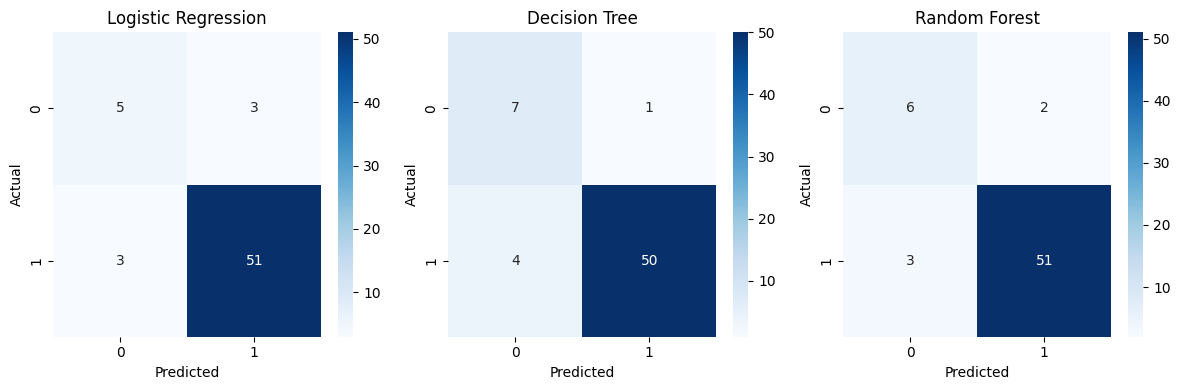

In [11]:
plt.figure(figsize=(12,4))
for i, (name, y_pred) in enumerate(preds.items()):
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1,3,i+1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()


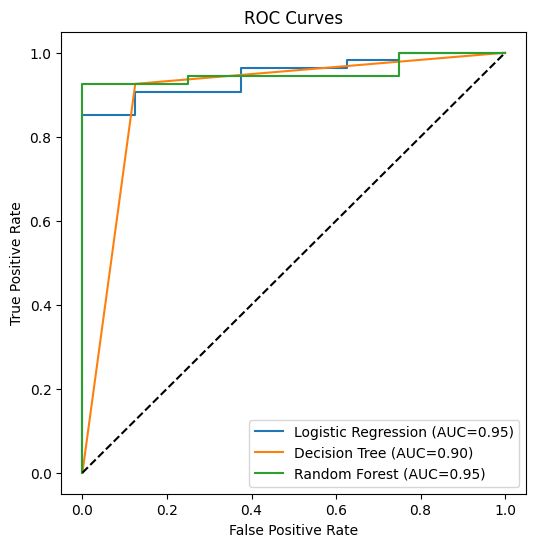

In [12]:
plt.figure(figsize=(6,6))
for name, y_prob in probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()
